In [1]:
import pandas as pd

In [3]:
df= pd.read_csv("WeatherDataSet1/combined_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,Date,tmax,tmin,prcp,City_Name
0,1,1892-01-01,32.0,-5.0,0.00,Lander
1,2,1892-01-02,38.0,2.0,0.00,Lander
2,3,1892-01-03,50.0,16.0,0.00,Lander
3,4,1892-01-04,46.0,32.0,0.00,Lander
4,5,1892-01-05,21.0,10.0,0.16,Lander


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409958 entries, 0 to 6409957
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date        object 
 2   tmax        float64
 3   tmin        float64
 4   prcp        float64
 5   City_Name   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 293.4+ MB


In [9]:
df.describe()

,Unnamed: 0,tmax,tmin,prcp
count,6.409958e+06,6.047890e+06,6.050635e+06,6.099249e+06
mean,2.536357e+04,6.281930e+01,4.174642e+01,8.896278e-02
std,1.479549e+04,2.138376e+01,1.963148e+01,2.789425e-01
min,1.000000e+00,-3.800000e+01,-5.900000e+01,0.000000e+00
25%,1.261900e+04,4.700000e+01,2.900000e+01,0.000000e+00
50%,2.523700e+04,6.600000e+01,4.300000e+01,0.000000e+00
75%,3.785500e+04,8.000000e+01,5.700000e+01,2.000000e-02
max,6.136100e+04,1.190000e+02,8.900000e+01,1.607000e+01


In [11]:
df = df.drop("Unnamed: 0", axis=1)
missing_values = df.isnull().sum()
print(missing_values)

Date              0
tmax         362068
tmin         359323
prcp         310709
City_Name         0
dtype: int64


In [13]:
df = df.dropna()

In [15]:
df['tmax'].fillna(df['tmax'].mean(), inplace = True)
df['tmin'].fillna(df['tmin'].mean(), inplace = True)
df['prcp'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14420\20428562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tmax'].fillna(df['tmax'].mean(), inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14420\20428562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df

,Date,tmax,tmin,prcp,City_Name
0,1892-01-01,32.0,-5.0,0.00,Lander
1,1892-01-02,38.0,2.0,0.00,Lander
2,1892-01-03,50.0,16.0,0.00,Lander
3,1892-01-04,46.0,32.0,0.00,Lander
4,1892-01-05,21.0,10.0,0.16,Lander
...,...,...,...,...,...
6409953,2023-12-27,51.1,44.1,0.09,Detroit
6409954,2023-12-28,45.0,39.9,0.28,Detroit
6409955,2023-12-29,41.0,37.9,0.06,Detroit
6409956,2023-12-30,39.9,30.2,0.00,Detroit


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = df[['tmax', 'tmin', 'prcp']]

# Z-Score Standardization
standard_scaler = StandardScaler()
df[['tmax_std', 'tmin_std', 'prcp_std']] = standard_scaler.fit_transform(features)

# Label Encoding for City_Name
label_encoder = LabelEncoder()
df['City_Label'] = label_encoder.fit_transform(df['City_Name'])

df.drop(['tmax', 'tmin', 'prcp','City_Name'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,tmax_std,tmin_std,prcp_std,City_Label
0,1892-01-01,-1.444024,-2.386899,-0.318414,67
1,1892-01-02,-1.163249,-2.029998,-0.318414,67
2,1892-01-03,-0.601700,-1.316196,-0.318414,67
3,1892-01-04,-0.788883,-0.500423,-0.318414,67
4,1892-01-05,-1.958777,-1.622111,0.256470,67
...,...,...,...,...,...
5966435,2023-12-27,-0.550224,0.116506,0.004958,33
5966436,2023-12-28,-0.835679,-0.097635,0.687633,33
5966437,2023-12-29,-1.022862,-0.199607,-0.102833,33
5966438,2023-12-30,-1.074337,-0.592198,-0.318414,33


In [23]:
df = df[df['Date'].between('2017-01-01', '2023-12-31')]

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14420\1162377328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14420\1162377328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14420\1162377328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Date,tmax_std,tmin_std,prcp_std,City_Label,Year,Month,Day
45345,2017-01-01,-1.584411,-1.979012,-0.246554,67,2017,1,1
45346,2017-01-02,-2.333143,-2.284927,0.400191,67,2017,1,2
45347,2017-01-03,-2.754305,-2.233942,-0.318414,67,2017,1,3
45348,2017-01-04,-2.660714,-2.233942,0.436121,67,2017,1,4
45349,2017-01-05,-2.801101,-2.998729,-0.282484,67,2017,1,5
...,...,...,...,...,...,...,...,...
5966435,2023-12-27,-0.550224,0.116506,0.004958,33,2023,12,27
5966436,2023-12-28,-0.835679,-0.097635,0.687633,33,2023,12,28
5966437,2023-12-29,-1.022862,-0.199607,-0.102833,33,2023,12,29
5966438,2023-12-30,-1.074337,-0.592198,-0.318414,33,2023,12,30


In [25]:
# Features (standardized values + date features)
X = df[['City_Label', 'Year', 'Month', 'Day']]  # Include Date features
y_tmax = df['tmax_std']  # Target: standardized max temperature
y_tmin = df['tmin_std']  # Target: standardized min temperature
y_prcp = df['prcp_std']  # Target: standardized precipitation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X_train, X_test, y_train_tmax, y_test_tmax = train_test_split(X, y_tmax, test_size=0.2, random_state=42)
X_train, X_test, y_train_tmin, y_test_tmin = train_test_split(X, y_tmin, test_size=0.2, random_state=42)

In [29]:


gbm_tmax = GradientBoostingRegressor(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42)
gbm_tmin = GradientBoostingRegressor(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42)

gbm_tmax.fit(X_train, y_train_tmax)
gbm_tmin.fit(X_train, y_train_tmin)

# Predictions
y_pred_tmax = gbm_tmax.predict(X_test)
y_pred_tmin = gbm_tmin.predict(X_test)

In [31]:
# Evaluate the models using regression metrics
print("Evaluation for tmax:")
print(f"MAE: {mean_absolute_error(y_test_tmax, y_pred_tmax)}")
print(f"MSE: {mean_squared_error(y_test_tmax, y_pred_tmax)}")
print(f"R² score: {r2_score(y_test_tmax, y_pred_tmax)}")

print("\nEvaluation for tmin:")
print(f"MAE: {mean_absolute_error(y_test_tmin, y_pred_tmin)}")
print(f"MSE: {mean_squared_error(y_test_tmin, y_pred_tmin)}")
print(f"R² score: {r2_score(y_test_tmin, y_pred_tmin)}")

Evaluation for tmax:
MAE: 0.32192803753459137
MSE: 0.16716682177261205
R² score: 0.8288766784852407

Evaluation for tmin:
MAE: 0.30826525192703064
MSE: 0.15747526293269437
R² score: 0.838109246181777


Predicted Maximum Temperature for 2025-01-01 in Lander: 32.99°F
Predicted Minimum Temperature for 2025-01-01 in Lander: 22.10°F
Predicted Maximum Temperature for 2025-01-02 in Lander: 32.99°F
Predicted Minimum Temperature for 2025-01-02 in Lander: 22.10°F
Predicted Maximum Temperature for 2025-01-03 in Lander: 32.99°F
Predicted Minimum Temperature for 2025-01-03 in Lander: 22.10°F
Predicted Maximum Temperature for 2025-01-04 in Lander: 35.61°F
Predicted Minimum Temperature for 2025-01-04 in Lander: 22.10°F
Predicted Maximum Temperature for 2025-01-05 in Lander: 34.87°F
Predicted Minimum Temperature for 2025-01-05 in Lander: 16.74°F
Predicted Maximum Temperature for 2025-01-06 in Lander: 33.78°F
Predicted Minimum Temperature for 2025-01-06 in Lander: 15.71°F
Predicted Maximum Temperature for 2025-01-07 in Lander: 33.78°F
Predicted Minimum Temperature for 2025-01-07 in Lander: 15.71°F
Predicted Maximum Temperature for 2025-01-08 in Lander: 33.78°F
Predicted Minimum Temperature for 2025-0

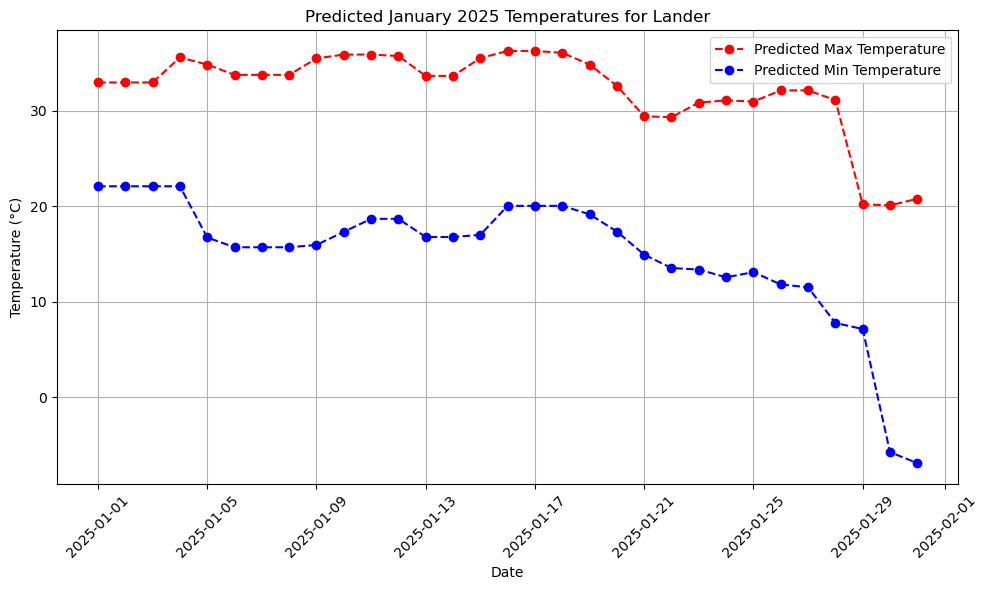

In [35]:
def predict_temperature(input_date, input_city):
    # Convert input date to datetime format
    input_date = pd.to_datetime(input_date)
    
    # Extract year, month, and day from the input date
    input_year = input_date.year
    input_month = input_date.month
    input_day = input_date.day
    
    # Label encode the input city
    try:
        city_label = label_encoder.transform([input_city])[0]  # Transform city to numeric label
    except ValueError:
        print(f"City '{input_city}' not found in the dataset.")
        return
    
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'City_Label': [city_label],
        'Year': [input_year],
        'Month': [input_month],
        'Day': [input_day]
    })
    
    # Predict the standardized temperatures using the trained models
    pred_tmax_std = gbm_tmax.predict(input_data)[0]
    pred_tmin_std = gbm_tmin.predict(input_data)[0]

    pred_std_array = [[pred_tmax_std, pred_tmin_std, 0]] 
    
    # Inverse transform the predictions to get the actual temperature values
    pred_tmax, pred_tmin, _ = standard_scaler.inverse_transform(pred_std_array)[0]
    
    # Print the predicted temperatures
    print(f"Predicted Maximum Temperature for {input_date.date()} in {input_city}: {pred_tmax:.2f}°F")
    print(f"Predicted Minimum Temperature for {input_date.date()} in {input_city}: {pred_tmin:.2f}°F")

    return pred_tmax, pred_tmin




def predict_january_2025(input_city):
    january_dates = pd.date_range(start="2025-01-01", end="2025-01-31")  # All days in January 2025
    predicted_tmax = []
    predicted_tmin = []
    
    for date in january_dates:
        pred_tmax, pred_tmin = predict_temperature(date, input_city)
        predicted_tmax.append(pred_tmax)
        predicted_tmin.append(pred_tmin)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(january_dates, predicted_tmax, label='Predicted Max Temperature', color='red', linestyle='--', marker='o')
    plt.plot(january_dates, predicted_tmin, label='Predicted Min Temperature', color='blue', linestyle='--', marker='o')
    
    plt.title(f"Predicted January 2025 Temperatures for {input_city}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to predict temperatures for January 2025 for city "Lander"
input_city = "Lander"
predict_january_2025(input_city)

Predicted Maximum Temperature for 2025-01-01 in Milwaukee: 41.86°F
Predicted Minimum Temperature for 2025-01-01 in Milwaukee: 32.38°F
Predicted Maximum Temperature for 2025-01-02 in Milwaukee: 41.86°F
Predicted Minimum Temperature for 2025-01-02 in Milwaukee: 32.38°F
Predicted Maximum Temperature for 2025-01-03 in Milwaukee: 41.58°F
Predicted Minimum Temperature for 2025-01-03 in Milwaukee: 32.38°F
Predicted Maximum Temperature for 2025-01-04 in Milwaukee: 42.10°F
Predicted Minimum Temperature for 2025-01-04 in Milwaukee: 32.38°F
Predicted Maximum Temperature for 2025-01-05 in Milwaukee: 40.38°F
Predicted Minimum Temperature for 2025-01-05 in Milwaukee: 27.01°F
Predicted Maximum Temperature for 2025-01-06 in Milwaukee: 39.30°F
Predicted Minimum Temperature for 2025-01-06 in Milwaukee: 25.99°F
Predicted Maximum Temperature for 2025-01-07 in Milwaukee: 39.52°F
Predicted Minimum Temperature for 2025-01-07 in Milwaukee: 25.99°F
Predicted Maximum Temperature for 2025-01-08 in Milwaukee: 39.

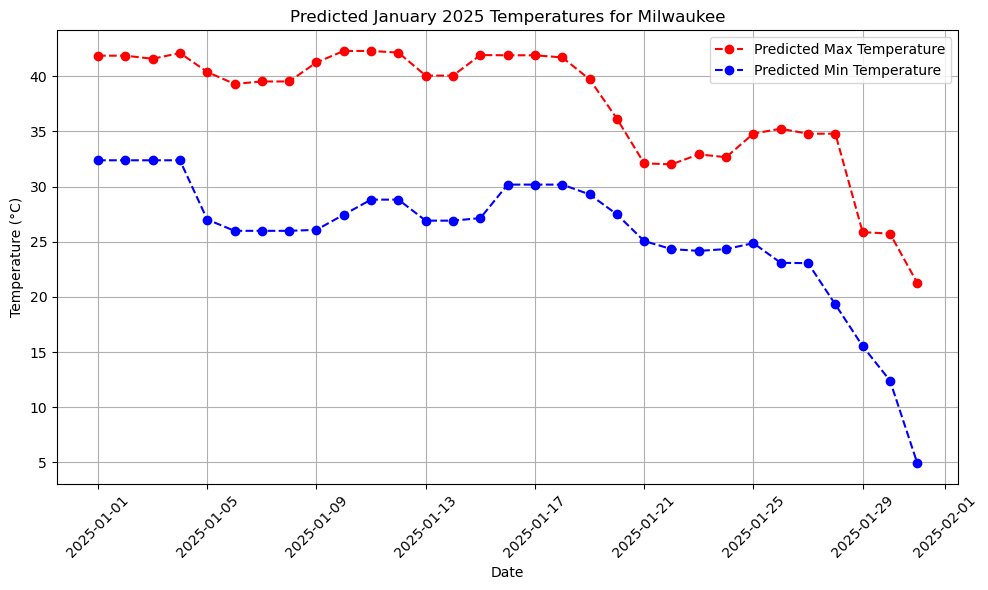

In [37]:
predict_january_2025("Milwaukee")